In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
import statsmodels.api as sm
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
import math
import matplotlib.colors as mcolors

# Fig 3a-b

In [2]:
def plot_reg(plot_df,index,metadata,color):
    rcParams['font.family'] = 'Arial'
    rcParams['pdf.fonttype'] = 42
    X = sm.add_constant(plot_df[f'{index}'])  # 加入常数项（截距）
    y = plot_df[f'{metadata}']
    model = sm.OLS(y, X)  # 线性回归模型
    results = model.fit()   
    slope = results.params[1]
    intercept = results.params[0]
    r_squared = results.rsquared
    p_value = results.pvalues[1] 

    plt.figure(figsize=(5, 3.5))  # 调整图的大小，宽10英寸，高6英寸

    sns.regplot(x=f'{index}', y=f'{metadata}', data=plot_df, 
                scatter_kws={'s': 70, 'alpha': 0.2, 'color': f'{color}'}, 
                line_kws={'color':'red','lw': 2})
    plt.xlabel(f'{index}', fontsize=18)
    plt.ylabel(f'{metadata}', fontsize=18)
    plt.xticks(fontsize=12)  # 设置x轴刻度的字体大小
    plt.yticks(fontsize=12) 
    plt.text(0.45, 0.85, f'Y = {slope:.2f}X + {intercept:.2f}', transform=plt.gca().transAxes, fontsize=16, color='black')
    if p_value < 0.001:
        plt.text(0.45, 0.75, f'R² = {r_squared:.3f}   P value < 0.001', 
             transform=plt.gca().transAxes, fontsize=12, color='black', 
             ha='left')  # 使用ha='center'来确保文字居中
    else:
        plt.text(0.45, 0.75, f'R² = {r_squared:.3f}   P value = {p_value:.3f}', 
             transform=plt.gca().transAxes, fontsize=12, color='black', 
             ha='left')  # 使用ha='center'来确保文字居中
    for spine in plt.gca().spines.values():
        spine.set_linewidth(2)  
    plt.tight_layout()
    return results

In [3]:
df3ab = pd.read_csv('Fig3ab.csv',index_col = 0)

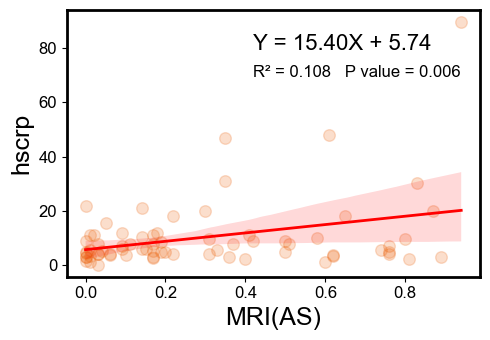

In [4]:
Fig3a = plot_reg(df3ab,'MRI(AS)','hscrp','#EB5B00')
plt.savefig("Fig3a.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

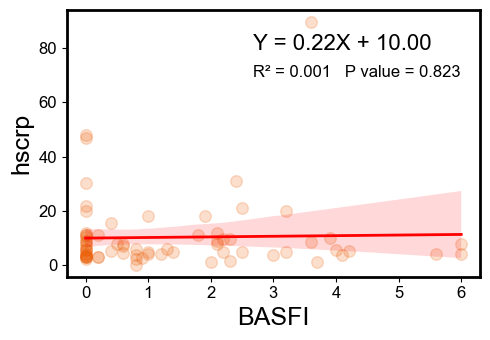

In [5]:
Fig3a = plot_reg(df3ab,'BASFI','hscrp','#EB5B00')
plt.savefig("Fig3b.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

# Fig 3c

In [6]:
df3c = pd.read_csv('./Fig3c.csv',index_col = 0)

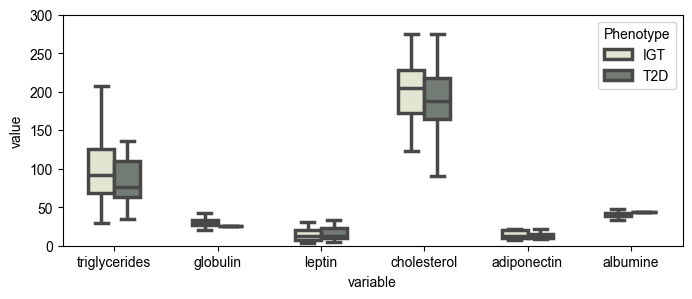

In [7]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42

fig,ax = plt.subplots(figsize=(8,3))
ax = sns.boxplot(x='variable', y='value', hue='Phenotype',
                 data=df3c,
                 palette=['#E1EACD', '#727D73'],
                 #alpha = 0.5,
                 linewidth=2.5, 
                 showfliers=False,
                 hue_order=['IGT','T2D'],
                 width=0.5,
                 ax=ax)
ax.set_ylim(0,300)
plt.savefig("Fig3c.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')

plt.show()

# Fig 3d-e

In [8]:
df3de = pd.read_csv('./Fig3de.csv',index_col = 0)

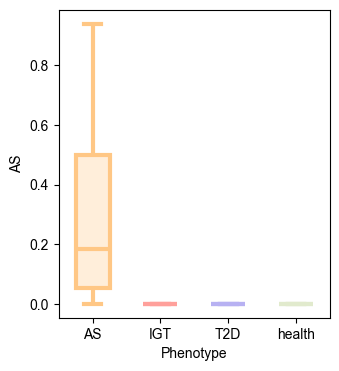

In [9]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
fig,ax = plt.subplots(figsize=(3.5,4))
ax = sns.boxplot(x='Phenotype', y='AS',
         palette= ['#FAC67A','#8EA3A6','#A084DC','#BDE8CA'],
        data=df3de,
        linewidth=3, 
        showfliers=False,
        order=['AS','IGT','T2D','health'],
        width=0.5,
        ax = ax)
p = 0
n = 4
for box in ax.patches:
    #print(box.__class__.__name__)
    if box.__class__.__name__ == 'PathPatch':
        if p % n == 0:
            box.set_edgecolor('#FFC785')
            box.set_facecolor(('#FFC785',0.3))
            for k in range(6*p,6*p+5):
                ax.lines[k].set_color('#FFC785')
            p += 1
        elif p % n == 1:
            box.set_edgecolor('#FFA09B')
            box.set_facecolor(('#FFA09B',0.5))
            for k in range(6*p-1,6*p+4):
                #print(len(ax.lines))
                ax.lines[k].set_color('#FFA09B')
            p +=1
        elif p % n ==2:
            box.set_edgecolor('#B7B1F2')
            box.set_facecolor(('#B7B1F2',0.5))
            for k in range(6*p-2,6*p+3):
                #print(len(ax.lines))
                #print(p)
                ax.lines[k].set_color('#B7B1F2')
            p +=1
        else:
            box.set_edgecolor('#E1EACD')
            box.set_facecolor(('#E1EACD',0.5))
            for k in range(7*p-6,7*p-1):
                #print(len(ax.lines))
                #print(p)
                ax.lines[k].set_color('#E1EACD')
plt.savefig("Fig3d.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()

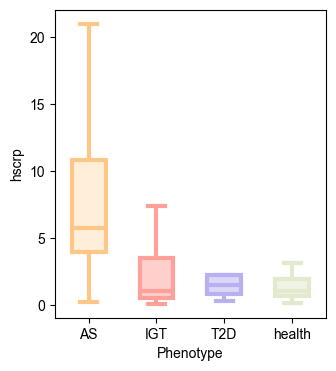

In [10]:
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42
fig,ax = plt.subplots(figsize=(3.5,4))
ax = sns.boxplot(x='Phenotype', y='hscrp',
         palette= ['#FAC67A','#8EA3A6','#A084DC','#BDE8CA'],
        data=df3de,
        linewidth=3, 
        showfliers=False,
        order=['AS','IGT','T2D','health'],
        width=0.5,
        ax = ax)

p = 0
n = 4
for box in ax.patches:
    #print(box.__class__.__name__)
    if box.__class__.__name__ == 'PathPatch':
        if p % n == 0:
            box.set_edgecolor('#FFC785')
            box.set_facecolor(('#FFC785',0.3))
            for k in range(6*p,6*p+5):
                ax.lines[k].set_color('#FFC785')
            p += 1
        elif p % n == 1:
            box.set_edgecolor('#FFA09B')
            box.set_facecolor(('#FFA09B',0.5))
            for k in range(6*p-1,6*p+4):
                #print(len(ax.lines))
                ax.lines[k].set_color('#FFA09B')
            p +=1
        elif p % n ==2:
            box.set_edgecolor('#B7B1F2')
            box.set_facecolor(('#B7B1F2',0.5))
            for k in range(6*p-2,6*p+3):
                #print(len(ax.lines))
                #print(p)
                ax.lines[k].set_color('#B7B1F2')
            p +=1
        else:
            box.set_edgecolor('#E1EACD')
            box.set_facecolor(('#E1EACD',0.5))
            for k in range(7*p-6,7*p-1):
                #print(len(ax.lines))
                #print(p)
                ax.lines[k].set_color('#E1EACD')
plt.savefig("Fig3e.pdf", dpi=300, bbox_inches='tight', transparent=True, format='pdf')

plt.show()

# Fig 3f

In [11]:
df3f1  = pd.read_excel('./Fig3f.xlsx',sheet_name='effective_values',index_col=0)
df3f2  = pd.read_excel('./Fig3f.xlsx',sheet_name='p_values',index_col=0)

In [12]:
category_labels = df3f1['Category']

In [13]:
df3f1 = df3f1.sort_values(by='Category').drop(columns=['Category'])
df3f2 = df3f2.loc[df3f1.index]

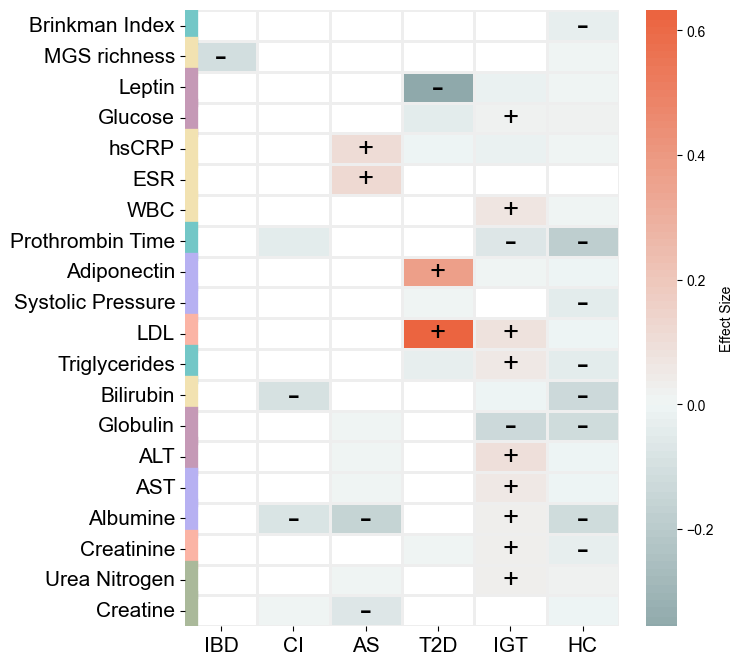

In [14]:
category_colors = {
    'Inflammation': '#C599B6',
    'Lipid Metabolism': '#B7B1F2',
    'Liver Function': '#F2E2B1',
    'Renal Function': '#73C7C7',
    'Glucose Metabolism': '#FBB4A5',
    'General Health': '#AAB99A'
}
colors = ["#497174", "#EFF5F5", "#EB6440"]  
n_bins = 100 
cmap_name = "custom_cmap"

cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(7, 8))
ax = sns.heatmap(df3f1, annot=False, fmt='.2f', cmap=cm, center=0, cbar_kws={'label': 'Effect Size'},
                 mask=df3f2.isna(), linewidths=0.8, linecolor='#EEEEEE')


for i in range(df3f1.shape[0]):
    for j in range(df3f1.shape[1]):
        if not np.isnan(df3f2.iloc[i, j]) and df3f2.iloc[i, j] < 0.05:  # p<0.05显著
            if df3f1.iloc[i, j] > 0:
                ax.text(j+0.5, i+0.5, '+', color='black', ha='center', va='center', fontsize=20)
            else:
                ax.text(j+0.5, i+0.5, '-', color='black', ha='center', va='center', fontsize=25)


for idx, label in enumerate(category_labels):
    ax.axhspan(idx, idx+1, color=category_colors[label], lw=6, xmin=-0.05, xmax=0.02)

plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)  

plt.savefig(f'Fig3f.pdf', dpi=300, bbox_inches='tight', transparent=True, format='pdf')
plt.show()